In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('melb_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [32]:
df.drop(columns = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'YearBuilt', 'Address'])

,Suburb,Type,Price,Method,SellerG,Date,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,h,1480000.0,S,Biggin,3/12/2016,1.0,202.0,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,h,1035000.0,S,Biggin,4/02/2016,0.0,156.0,79.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,h,1465000.0,SP,Biggin,4/03/2017,0.0,134.0,150.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,h,850000.0,PI,Biggin,4/03/2017,1.0,94.0,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,h,1600000.0,VB,Nelson,4/06/2016,2.0,120.0,142.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,h,1245000.0,S,Barry,26/08/2017,2.0,652.0,NaN,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,h,1031000.0,SP,Williams,26/08/2017,2.0,333.0,133.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,h,1170000.0,S,Raine,26/08/2017,4.0,436.0,NaN,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,h,2500000.0,PI,Sweeney,26/08/2017,5.0,866.0,157.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [6]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [33]:
import association_metrics as am

In [11]:
correlation_ratio(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'YearBuilt'])

TypeError: correlation_ratio() missing 1 required positional argument: 'measurements'

In [34]:
df = df.drop(columns= ['Address'])
df = df.apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

cramersv = am.CramersV(df) 
cramersv.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/association_metrics/categorical.py:100: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.matrix[x][y] = 1
/Library/Frameworks/Python.framework/Versions/3.12/li

,Suburb,Type,Method,SellerG,Date,CouncilArea,Regionname
Suburb,1.000000,0.351858,0.211990,0.297489,0.164114,0.968873,1.000000
Type,0.351858,1.000000,0.066494,0.246874,0.140678,0.250042,0.155056
Method,0.211990,0.066494,1.000000,0.201823,0.083221,0.126310,0.083524
SellerG,0.297489,0.246874,0.201823,1.000000,0.148872,0.465877,0.522918
Date,0.164114,0.140678,0.083221,0.148872,1.000000,0.106075,0.137652
CouncilArea,0.968873,0.250042,0.126310,0.465877,0.106075,1.000000,0.805690
Regionname,1.000000,0.155056,0.083524,0.522918,0.137652,0.805690,1.000000


Text(0.5, 1.0, "Categorical Cramer's V")

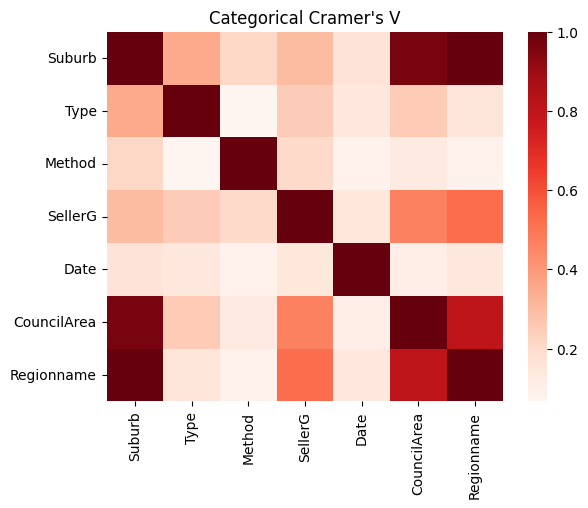

In [36]:
sns.heatmap(cramersv.matrix, cmap = 'Reds')
plt.title('Categorical Cramer\'s V')